<a href="https://colab.research.google.com/github/MahinArvind/DL-projects/blob/main/Alzheimers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alzheimer's Classification

##Importing Modules


In [2]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## Loading Data

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahinarvind","key":"aec012dfad33b5d2902ee02c95ad9d47"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 73% 25.0M/34.1M [00:00<00:00, 47.1MB/s]
100% 34.1M/34.1M [00:00<00:00, 63.3MB/s]


In [7]:
from zipfile import ZipFile
filename = 'alzheimers-dataset-4-class-of-images.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


##Data Preprocessing

In [8]:
import os

_URL = '/content/Alzheimer_s Dataset'

train_path = os.path.join(_URL, 'train')
valid_path = os.path.join(_URL, 'test')

In [9]:
BATCH_SIZE = 32
IMG_SIZE = [224, 224]

vgg = VGG16(input_shape=IMG_SIZE + [3], weights='imagenet', include_top=False)
  

58900480/58889256 [==============================] - 1s 0us/step


In [10]:
for layer in vgg.layers:
  layer.trainable = False

In [11]:
folders = glob('/content/Alzheimer_s Dataset/train/*')
print(len(folders))

4


In [12]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/Alzheimer_s Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/Alzheimer_s Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
5/5 [==============================] - 93s 19s/step - loss: 1.4724 - accuracy: 0.4375 - val_loss: 1.6770 - val_accuracy: 0.4062
Epoch 2/5
5/5 [==============================] - 100s 21s/step - loss: 1.8856 - accuracy: 0.4750 - val_loss: 1.6516 - val_accuracy: 0.5625
Epoch 3/5
5/5 [==============================] - 95s 20s/step - loss: 1.3136 - accuracy: 0.5375 - val_loss: 1.5787 - val_accuracy: 0.4375
Epoch 4/5
5/5 [==============================] - 100s 21s/step - loss: 1.2402 - accuracy: 0.4500 - val_loss: 1.0593 - val_accuracy: 0.5938
Epoch 5/5
5/5 [==============================] - 100s 21s/step - loss: 1.3555 - accuracy: 0.5000 - val_loss: 1.1983 - val_accuracy: 0.6562


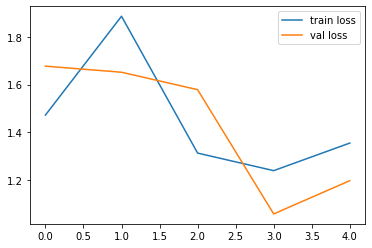

<Figure size 432x288 with 0 Axes>

In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch= 5,
  validation_steps= 1
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



The Accuracy Increases further as the number of epochs is increased. Haven't been done here due to GPU constraints.

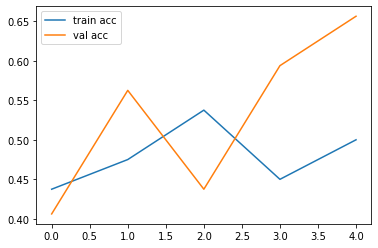

<Figure size 432x288 with 0 Axes>

In [18]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Use buffered prefetching to load images from disk without having I/O become blocking.
[data performance guide](https://www.tensorflow.org/guide/data_performance)